## 排序 （Ranking）

### 坡度图 （Slope Chart）

坡度图最适合比较给定人/项目的“前”和“后”位置。

### 导入所需要的库

In [1]:
import numpy as np              # 导入numpy库
import pandas as pd             # 导入pandas库
import matplotlib as mpl        # 导入matplotlib库
import matplotlib.pyplot as plt
import seaborn as sns           # 导入seaborn库
import matplotlib.lines as mlines

### 设定图像各种属性

In [2]:
large = 22; med = 16; small = 12

params = {'axes.titlesize': large,      # 设置子图上的标题字体
            'legend.fontsize': med,     # 设置图例的字体
            'figure.figsize': (16, 10), # 设置图像的画布
           'axes.labelsize': med,       # 设置标签的字体
            'xtick.labelsize': med,     # 设置x轴上的标尺的字体
            'ytick.labelsize': med,     # 设置整个画布的标题字体
          'figure.titlesize': large}  
plt.rcParams.update(params)             # 更新默认属性
plt.style.use('seaborn-whitegrid')      # 设定整体风格
sns.set_style("white")                  # 设定整体背景风格

### 测试版本

In [3]:
print(mpl.__version__)
print(sns.__version__)
print(pd.__version__)
print(np.__version__)

3.1.0
0.9.0
0.24.2
1.16.4


### 程序代码

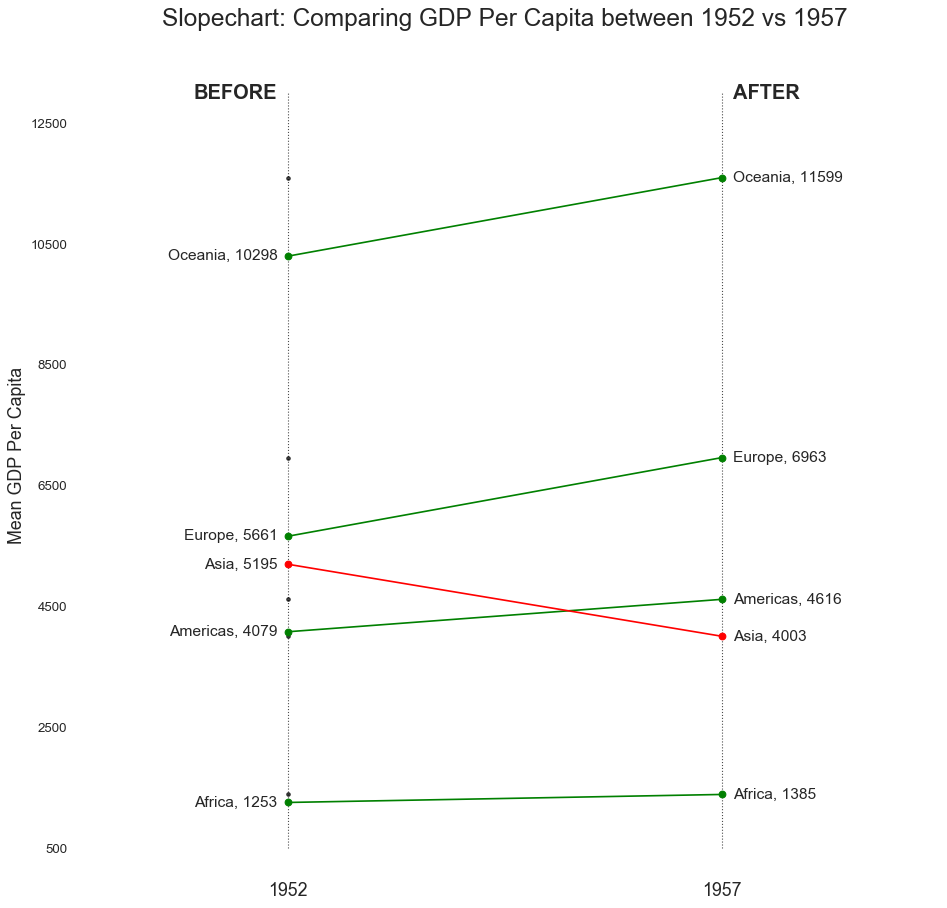

In [4]:
# step1: 导入数据
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/gdppercap.csv")
    # round__返回一个整数(四舍五入)
left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1952'])]   # 获取左一栏的标签  
right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1957'])]  # 获取右一栏的标签
klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(df['1952'], df['1957'])]   # 获取类别

# 绘制坡度图 
    # 创建绘制折线的函数
def newline(p1, p2,                 # 输入被连接的坐标
            color = 'black'):       # 
    ax = plt.gca()                  # 获取当前对象的子图，如果没有子图就创建一个子图
    l = mlines.Line2D([p1[0],p2[0]],                               # 连接点的坐标(x与x)
                     [p1[1],p2[1]],                                # 连接点的坐标(y与y)
                     color='red' if p1[1]-p2[1]>0 else 'green',    # 线的颜色
                      marker='o',                                  # 点的形状
                     markersize = 6)                               # 点的尺寸
    ax.add_line(l)                  # 当l添加至子图对象
    return l
    # 创建画布以及子图对象
fig, ax = plt.subplots(1,1,                     # 一行一列
                       figsize = (14, 14),      # 画布尺寸
                      dpi = 80)                 # 分辨率
    # 绘制柱状图
ax.vlines(x=1,                                  # 横坐标
         ymin=500,                              # 柱状图在y轴的起点
         ymax = 13000,                          # 柱状图在y轴的终点
         color = 'black',                       # 柱状图的颜色
         alpha = 0.7,                           # 透明度 
         linewidth=1,                           # 线宽
         linestyles='dotted')                   # 柱状图风格  
ax.vlines(x=3,                                  # 横坐标
         ymin=500,                              # 柱状图在y轴的起点
         ymax = 13000,                          # 柱状图在y轴的终点
         color = 'black',                       # 柱状图的颜色
         alpha = 0.7,                           # 透明度 
         linewidth=1,                           # 线宽
         linestyles='dotted')                   # 柱状图风格  
    # 绘制散点
ax.scatter(y=df['1952'],                    # 纵坐标     
          x=np.repeat(1, df.shape[0]),      # 横坐标(1__需要重复的对象，df.shape[0]__需要被重复的次数)
          s =10,                            # 点的尺寸
          color = 'black',                  # 点的颜色
          alpha = 0.7)                      # 点的透明度
ax.scatter(y=df['1957'],
          x = np.repeat(1, df.shape[0]),
          s = 10,
          color = 'black',
          alpha= 0.7)

# step3：绘制折线
for p1, p2, c in zip(df['1952'], df['1957'], df['continent']):   # 遍历获取'1952'的数据，'1957'的数据，以及'contient'的数据
    # 绘制折线
    newline([1, p1], [3, p2])               # 使用newline函数绘制折线
    # 添加文字
    ax.text(1-0.05,                         # 横坐标    
            p1,                             # 纵坐标
           c + ', ' + str(round(p1)),       # 文本内容(洲+对text进行四舍五入运算)
           horizontalalignment = 'right',   # 水平对齐参数
           verticalalignment='center',      # 垂直对齐参数
           fontdict = {'size':14})          # 用于覆盖默认文本属性的字典（添加颜色和尺寸）
    ax.text(3+0.05,                         # 横坐标
            p2,                             # 纵坐标
            c + ', ' + str(round(p2)),      # 添加文字的内容(洲+对text进行四舍五入运算)   
            horizontalalignment='left',     # 水平对齐参数
            verticalalignment='center',     # 垂直对齐参数
            fontdict={'size':14})           # 用于覆盖默认文本属性的字典（添加颜色和尺寸）

# step4：添加“Before”和“After”
ax.text(1-0.05,                                # 横坐标
        13000,                                 # 纵坐标 
        'BEFORE',                              # 文本内容
        horizontalalignment='right',           # 水平对齐参数
        verticalalignment='center',            # 垂直对齐参数
        fontdict={'size':18,                   # 字体尺寸
                  'weight':700})               # 加粗字体
ax.text(3+0.05,                                # 横坐标 
        13000,                                 # 纵坐标 
         'AFTER',                              # 文本内容 
        horizontalalignment='left',            # 水平对齐参数
        verticalalignment='center',            # 垂直对齐参数
        fontdict={'size':18,                   # 字体尺寸
                  'weight':700})               # 加粗字体

# 装饰图像
    # 设置横纵坐标标尺范围，标题
ax.set_title("Slopechart: Comparing GDP Per Capita between 1952 vs 1957",  # 设置标题
             fontdict={'size':22})                                         # 字体尺寸
ax.set(xlim=(0,4),                         # 横坐标取值范围
      ylim=(0,14000),                      # 纵坐标取值范围    
      ylabel = 'Mean GDP Per Capita')      # 纵坐标标题
ax.set_xticks([1,3])                       # 横坐标标尺
ax.set_xticklabels(["1952", "1957"])       # 横坐标标尺的标题
plt.yticks(np.arange(500, 13000, 2000),    # 设置纵坐标标尺范围
          fontsize = 12)                   # 字体尺寸
    # 使横纵坐标透明
plt.gca().spines['top'].set_alpha(.0)         # 获取轴对象(顶部)使其透明度为0
plt.gca().spines['bottom'].set_alpha(.0)      # 获取轴对象(底部)使其透明度为0
plt.gca().spines['right'].set_alpha(.0)       # 获取轴对象(右部)使其透明度为0
plt.gca().spines['left'].set_alpha(.0)        # 获取轴对象(左部)使其透明度为0
plt.show()                                    # 显示图像